<a href="https://colab.research.google.com/github/taeyoonL/Test_Repository/blob/master/AI_and_Data_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Python 딕셔너리 객체를 생성한 후 Json 문자열로 변환하여 출력 후 다시 Python 객체로 변환하여 출력하고, 판다스 데이터프레임으로도 출력하는 실습
# 데이터 분석 Json

import json
import pandas as pd
d = [
    {
        'name' : '혼자서 공부하는 데이터 분석',
        'author' : ['박해선','홍길동'],
        'year': 2022
    },
    {
        'name' : 'no one likes us',
        'author' : ['김대웅','문지훈'],
        'year' : 2023
    }
    ]
df_J = json.dumps( d, ensure_ascii = False )
print(df_J)
df_P = json.loads(df_J)
print(df_P)
pd.read_json(df_J)

[{"name": "혼자서 공부하는 데이터 분석", "author": ["박해선", "홍길동"], "year": 2022}, {"name": "no one likes us", "author": ["김대웅", "문지훈"], "year": 2023}]
[{'name': '혼자서 공부하는 데이터 분석', 'author': ['박해선', '홍길동'], 'year': 2022}, {'name': 'no one likes us', 'author': ['김대웅', '문지훈'], 'year': 2023}]


,name,author,year
0,혼자서 공부하는 데이터 분석,"[박해선, 홍길동]",2022
1,no one likes us,"[김대웅, 문지훈]",2023


In [ ]:
# xml 문서를 생성하고, 이를 Python 객체로 변환 후 출력하는 실습
# 데이터 분석 xml
import xml.etree.ElementTree as et
import pandas as pd
xml = """
<books>
  <book>
    <name>혼자 공부하는 데이터 분석</name>
    <author>박해선</author>
    <year>2022</year>
  </book>
  <book>
    <name>혼자 공부하는 딥러닝, 머신러닝</name>
    <author>박해선</author>
    <year>2020</year>
  </book>
</books>
"""
book = et.fromstring(xml)
print(type(book))
print(book.tag)
for i in book.findall('book'):
  name = i.findtext('name')
  author = i.findtext('author')
  year = i.findtext('year')
  print(name)
  print(author)
  print(year)
  print()
pd.read_xml(xml)

<class 'xml.etree.ElementTree.Element'>
books
혼자 공부하는 데이터 분석
박해선
2022

혼자 공부하는 딥러닝, 머신러닝
박해선
2020



,name,author,year
0,혼자 공부하는 데이터 분석,박해선,2022
1,"혼자 공부하는 딥러닝, 머신러닝",박해선,2020


In [ ]:
pip install xmltodict

In [ ]:
# 공공데이터포털에서 신청한 Open API를 이용하여 XML 데이터를 파이썬 딕셔너리 객체로 변환하고, 그렇게 변환한 데이터를 표로 정리해 나타내는 실습입니다.
# XML 데이터 분석
# Open API
# from : XML // to : Python
import requests, xmltodict
import pandas as pd

url = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList'
params ={'serviceKey' : 'mar8LB8/KjPZtl6ixqWjkdz1wir2BtlYfNEs+k2GT2FlT5bwNVn0BCX6jDUefKx5fSjj8S5P7/fQouaGkP18yg==', 'pageNo' : '1', 'numOfRows' : '10', 'dataType' : 'XML', 'dataCd' : 'ASOS', 'dateCd' : 'DAY', 'startDt' : '20100101', 'endDt' : '20100601', 'stnIds' : '108' }

response = requests.get(url, params=params)
dict = xmltodict.parse(response.content)
df = dict['response']['body']['items']['item']
d = pd.DataFrame(df)
d_1 = d.loc[[0,1,2,3,4,5,6],['stnId','stnNm','tm','avgTa','minTa','minTaHrmt','maxTa','maxTaHrmt','avgM05Te']]
d_2 = d.iloc[[0,1,2,3,4,5,6,7,8],[2,3,4,5,6,7,8,9]]
print(d_1)
a = pd.DataFrame(d_2)

a.duplicated()


  stnId stnNm          tm  avgTa  minTa minTaHrmt maxTa maxTaHrmt avgM05Te
0   108    서울  2010-01-01   -7.6  -12.7      0654  -3.6      1501      2.4
1   108    서울  2010-01-02   -3.6   -7.4      2359   0.2      1524      2.3
2   108    서울  2010-01-03   -6.8  -10.5      0748  -3.2      1438      2.3
3   108    서울  2010-01-04   -5.9   -8.0      2400  -3.4      1425      2.2
4   108    서울  2010-01-05   -9.9  -12.3      2333  -7.0      1506      2.2
5   108    서울  2010-01-06  -11.2  -13.3      0627  -8.1      1350      2.2
6   108    서울  2010-01-07  -10.1  -13.6      0554  -5.5      1450      2.1


0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool

In [ ]:
# 데이터를 불러오고, 불필요한 행, 열 삭제, 중복된 행 삭제하기 등 데이터 정제를 하는 실습입니다.
# pandas 를 이용한 데이터 정제 실습

import requests
import pandas as pd
from bs4 import BeautifulSoup

url = 'http://apis.data.go.kr/4050000/libnewbk/getLibnewbk'
params ={'serviceKey' : 'mar8LB8/KjPZtl6ixqWjkdz1wir2BtlYfNEs+k2GT2FlT5bwNVn0BCX6jDUefKx5fSjj8S5P7/fQouaGkP18yg==', 'pageNo' : '3', 'numOfRows' : '5'}
response = requests.get(url, params=params)

dt = response.json()

data = [i for i in dt['items']]

pd_data = pd.DataFrame(data)

def page_count(title):
  link = 'https://www.yes24.com/Product/Search?domain=ALL&query={}'
  r = requests.get(link.format(title))
  soup = BeautifulSoup(r.text, 'html.parser')
  soup_find = soup.find('a', attrs={'class':'gd_name'})
  link_1 = 'https://www.yes24.com/'+soup_find['href']
  r_1 = requests.get(link_1)
  soup_1 = BeautifulSoup(r_1.text, 'html.parser')
  soup_1_find = soup_1.find('div', attrs={'id':'infoset_specific'})
  for tr in soup_1_find.find_all('tr'):
    if tr.find('th').get_text() == '쪽수, 무게, 크기':
      return tr.find('td').get_text().split()[0]
  return ''

def page_count_2(row):
  title = row['bk_nm']
  return page_count(title)

pd_data_page_cnt = pd_data.apply(page_count_2, axis = 1)

pd_data_page_cnt.name = 'page_count'

pd_data_merge = pd.merge(pd_data, pd_data_page_cnt, left_index=True, right_index=True)

pd_data_merge.drop(['loan_yn','rtn_ed'], axis = 1, inplace = True)

pd_data_final = pd_data_merge[~pd_data_merge.duplicated(subset = ['bk_nm','aut_nm','lib'])]

pd_data_final.set_index(['bk_nm','aut_nm','lib','page_count'], inplace=True)

pd_data_final.reset_index(inplace = True)

pd_data_final_1 = pd_data_final[pd_data_merge.columns]

pd_data_final_1

,no,bk_nm,aut_nm,pblshr,pblcn_yr,callno,lib,refrm,bk_rsvt,mutl_loan,page_count
0,11,노래하는 볼돼지,김영진 글·그림,길벗어린이,2009,유아 813-김64ㄱ-1=3,동백도서관,[동백]어린이자료실,Y,N,32쪽
1,12,내일은 실험왕,곰돌이 Co. 글 ; 홍종현 그림,Mirea N 아이세움,2009,만화 407-곰25ㄴ-10=4,기흥도서관,[기흥]어린이자료실,Y,N,172쪽


In [ ]:
# pandas 를 활용한 데이터 정제 실습

import pandas as pd

d = [
    {
        'no':1,
        'name':'가',
        'univ':'서강대학교',
        'age':20,
        'hobby':'driving',
        'wife':None
    },
    {
        'no':2,
        'name':'나',
        'univ':'서울대학교',
        'age':22,
        'hobby':'Korean SAT',
        'wife':None
    },
    {
        'no':3,
        'name':'다',
        'univ':'명지대학교',
        'age':23,
        'hobby':'TOEIC',
        'wife':None
    },
    {
        'no':4,
        'name':'가',
        'univ':'서강대학교',
        'age':20,
        'hobby':'driving',
        'wife':None
    },
]

data = pd.DataFrame(d)

data_1 = data.copy()

data_1.dropna(axis=1, inplace = True)

data_1.drop('no', axis=1, inplace = True)

data_2 = data_1.groupby(by=['name','univ','hobby'], dropna = False).sum()

data_3 = data_2.reset_index()

,name,univ,hobby,age
0,가,서강대학교,driving,40
1,나,서울대학교,Korean SAT,22
2,다,명지대학교,TOEIC,23


In [ ]:
# 뷰티플수프 클래스를 이용한 웹 크롤링을 통해 원하는 도서의 isbn 값만 있다면 그 도서의 쪽수를 구할 수 있는 프로그램입니다.
import requests
from bs4 import BeautifulSoup

isbn = input('쪽수를 구하고자 하는 도서의 isbn을 입력하세요.')
url = "https://www.yes24.com/product/search?query={}"
r = requests.get(url.format(isbn))

soup = BeautifulSoup(r.text, 'html.parser')
prd_link = soup.find('a', attrs = {'class':'gd_name'})

url_1 = "https://www.yes24.com/"+prd_link['href']
r_1 = requests.get(url_1)

soup_1 = BeautifulSoup(r_1.text, 'html.parser')
prd_link_1 = soup_1.find('div', attrs = {'id':'infoset_specific'})

prd_tr_list = prd_link_1.find_all('tr')

for tr in prd_tr_list:
  if tr.find('th').get_text() == '쪽수, 무게, 크기':
    page_td = tr.find('td').get_text()
    break

print(page_td.split()[0])

쪽수를 구하고자 하는 도서의 isbn을 입력하세요.9791190090018
330쪽


In [ ]:
# 검색어를 입력받으면 그 검색어에 맞는 뉴스를 네이버 뉴스에서 크롤링을 통해 가져오고, 기사의 제목과 링크를 제공하는 실습입니다.
# 뷰티플수프, 웹 크롤링, 뉴스

import requests
from bs4 import BeautifulSoup

search_word = input('찾으시는 거라도? ')
url_1 = 'https://m.search.naver.com/search.naver?where=m_news&sm=mtb_jum&query=' + search_word
r = requests.get(url_1)
soup = BeautifulSoup(r.text, 'html.parser')
soup_1 = soup.select_one('.list_news')
soup_2 = soup_1.select('.bx > .news_wrap > a')

for i in soup_2:
  title = i.get_text()
  url_2 = i.attrs['href']
  print(title)
  print(url_2)
  print('----------------------------------------------------------------')


찾으시는 거라도? 윤석열
 윤석열, 세계 잼버리에 “관광프로그램 추가하라” 
https://n.news.naver.com/article/082/0001225655?sid=100
----------------------------------------------------------------
 민주당 "'좌초 위기' 잼버리, 윤석열 정부 안일한 대응 때문" 
https://n.news.naver.com/article/469/0000753574?sid=100
----------------------------------------------------------------
 윤석열 대통령, 여름휴가 중 거제 전통시장 방문 
https://n.news.naver.com/article/666/0000018031?sid=100
----------------------------------------------------------------
 윤석열 대통령 "잼버리 위생관리에 만전 기해달라" 재차 당부 
http://m.kyeongin.com/view.php?key=20230806010001197
----------------------------------------------------------------
 잼버리 탈출 러시에 與野는 "문재인 탓" vs "윤석열 탓" 공방만[종합] 
https://n.news.naver.com/article/029/0002817723?sid=100
----------------------------------------------------------------
 윤석열 ‘처가 리스크’에 다시 주목받는 특별감찰관, 7년 만에 부활할까 
http://m.businesspost.co.kr/BP?command=mobile_view&idxno=323457
----------------------------------------------------------------
 윤석열 시계·컵·티셔츠·손수건…‘대통령 굿즈’ 용산어린이정원서 판

In [ ]:
# 웹 크롤링을 통해 가져온 여러 정보를 기존 책 데이터 프레임에 합치는 실습입니다.
# 데이터 분석 / 웹 크롤링 / 뷰티플수프

import requests
from bs4 import BeautifulSoup
import pandas as pd


d = [
    {
        'name' : '혼자서 공부하는 데이터 분석',
        'author' : ['박해선','홍길동'],
        'year': 2022,
        'isbn' : '9791169210287'
    },
    {
        'name' : '부의 추월차선',
        'author' : ['엠제이 드마코'],
        'year' : 2023,
        'isbn':'9791187444725'
    },
    {
        'name':'혼자서 공부하는 머신러닝+딥러닝',
        'author': ['박해선'],
        'year': 2020,
        'isbn' : '9791162243664'
    }
    ]

def book_weight(isbn):
  url = "https://www.yes24.com/product/search?query={}"
  r = requests.get(url.format(isbn))
  s = BeautifulSoup(r.text, 'html.parser')
  s_f_1 = s.find('a', attrs = {'class':'gd_name'})
  url_2 = "https://www.yes24.com/"+s_f_1['href']
  r_2 = requests.get(url_2)
  s_1 = BeautifulSoup(r_2.text, 'html.parser')
  s_f_2 = s_1.find('div', attrs = {'id':'infoset_specific'})
  for tr in s_f_2.find_all('tr'):
    if tr.find('th').get_text() == '쪽수, 무게, 크기':
      return tr.find('td').get_text().split()[2]
  return ''

def page_cnt(isbn):
  url = "https://www.yes24.com/product/search?query={}"
  r = requests.get(url.format(isbn))

  soup = BeautifulSoup(r.text, 'html.parser')
  prd_link = soup.find('a', attrs = {'class':'gd_name'})

  url_1 = "https://www.yes24.com/"+prd_link['href']
  r_1 = requests.get(url_1)

  soup_1 = BeautifulSoup(r_1.text, 'html.parser')
  prd_link_1 = soup_1.find('div', attrs = {'id':'infoset_specific'})

  prd_tr_list = prd_link_1.find_all('tr')

  for tr in prd_tr_list:
    if tr.find('th').get_text() == '쪽수, 무게, 크기':
      return tr.find('td').get_text().split()[0]
  return ''

def page_cnt_2(row):
  i = row['isbn']
  return page_cnt(i)

def book_weight_2(row):
  j = row['isbn']
  return book_weight(j)

d_p = pd.DataFrame(d)

d_p_c = d_p.apply(page_cnt_2, axis = 1)
d_p_w = d_p.apply(book_weight_2, axis = 1)

d_p_c.name = 'page_count'
d_p_w.name = 'book_weight'

merge_page_count = pd.merge(d_p, d_p_c, left_index=True, right_index = True)
merge_book_weight = pd.merge(merge_page_count, d_p_w, left_index = True, right_index = True)

final = merge_book_weight.iloc[:,[0,1,2,3,4,5]]
final

,name,author,year,isbn,page_count,book_weight
0,혼자서 공부하는 데이터 분석,"[박해선, 홍길동]",2022,9791169210287,496쪽,"1,050g"
1,부의 추월차선,[엠제이 드마코],2023,9791187444725,392쪽,672g
2,혼자서 공부하는 머신러닝+딥러닝,[박해선],2020,9791162243664,580쪽,"1,105g"


In [ ]:
import requests
import pandas as pd

url = "https://apis.data.go.kr/4180000/ccevent/getEventList?serviceKey=mar8LB8%2FKjPZtl6ixqWjkdz1wir2BtlYfNEs%2Bk2GT2FlT5bwNVn0BCX6jDUefKx5fSjj8S5P7%2FfQouaGkP18yg%3D%3D&pageNo=1&numOfRows=10"
d = requests.get(url)
d_P = d.json()
data = [i for i in d_P['data']]
a = pd.DataFrame(data)
b = a.iloc[:,0:11]
pd.DataFrame(b)

,eventNo,eventNm,site,info,startDate,endDate,startTime,endTime,feeInfo,managingDepartment,hostInstitution
0,1,춘천 라이브 박스 : RED BOX,축제극장몸짓,춘천 기반 아티스트의 라이브 스트리밍 공연,2022-03-03,2022-03-03,20:00,21:30,무료,춘천문화재단,춘천문화재단
1,2,제2회 호반음악제 피아졸라 나이트클럽 인 춘천,강원대 백령아트센터,코로나19 극복 기원 및 피아졸라 탄생 100주년 기념,2021-12-18,2021-12-18,18:30,20:30,유료,2018평창평화위원회,강원도민일보+강원도 춘천시청
2,3,"제4회 셰익스피어 페스티벌 '셰익스피어, 맥베스를 연주하다'",강원대학교 백령아트센터,맥베스 속 주인공들의 고외를 연글과 발레로 표현하고 그에 맞춰 첼로.피아노.트럼펫....,2021-11-19,2021-11-19,19:00,20:30,무료,셰익스피어와 함께하는 세상,셰익스피어와 함께하는세상
3,4,FESTA NYCC 2021 온라인 페스타 뉴욕 in 춘천,FESTA NYCC 유튜브 (온라인),춘천시 명예홍보대사인 세계 정상급 뉴욕의 젊은 음악가들과 다양한 음악꿈나무들이 직·...,2021-12-13,2021-12-22,19:30,19:30,무료,문화게랄라 향,강원도 춘천시청+춘천문화재단
4,5,2021춘천마임축제 물화일체,약사천 수변공원,사단법인 춘천마임축제는 몸이 가진 원초적 에너지와 예술적 상상력으로 축제 세상을 창...,2021-11-10,2021-11-11,19:00,22:00,무료,춘천마임축제,춘천마임축제
5,6,2021춘천마임축제 도깨비 유량단,"아르숲 생활문화센터, 꿈마루 청소년 수련관, 약사천 수변공원",서로의 낭만을 나누고 오늘의 낭만을 기록하며 익숙한 듯 낯선 공간에서 보내는 설렘과...,2021-11-08,2021-11-12,19:00,21:00,무료,춘천마임축제,춘천마임축제
6,7,박양순 명창 판소리 <흥보가> 완창 공연,춘천문화예술회관,9년만에 벌어지는 박양순 명창의 판소리 완창,2021-10-26,2021-10-26,14:00,17:00,무료,(사)한국전통판소리진흥회,(사)한국전통판소리진흥회
7,8,2021 춘천 한국지역도서전,공지천 조각공원 일대,지역 책에담다 마음에담다,2021-11-12,2021-11-14,15:00,17:00,무료,춘천지역출판연대+춘천한국지역도서전 조직위원회,춘천시+한국지역출판연대
8,9,음악으로 보는 이미지극 보이체크,축제극장 몸짓,1913년 초연이후 시대와 세대를 막론하고 존재하는 우리의 초상이며 저항할 수 없는...,2021-09-14,2021-09-15,19:30,21:00,유료,극단 무소의 뿔,극단 무소의 뿔
9,10,2021 꿈의 오케스트라 강릉 언택트 연주회 「향상더하기」 공개,강릉문화 tv,아티스트의 라이브 스트리밍 공연,2021-08-31,2021-08-31,17:30,17:40,무료,강릉시,강릉문화원


In [ ]:
# 데이터 분석

from google.colab import drive
import os
import csv

# 구글 드라이브 마운트
drive.mount('./gdrive', force_remount=True)
print(os.getcwd())

# temperature.csv 파일 경로
f = open('./gdrive/MyDrive/Colab Notebooks/temperature.csv','r',encoding = 'cp949')

# 최고 기온이 가장 높은 날짜와 기온 변수 초기화
highest_temp = None
highest_temp_date = None

reader = csv.reader(f,delimiter = ',')
header = next(reader)  # 헤더 건너뛰기

for row in reader:
    if row[0] != '' and row[1] != '' and row[2] != '' and row[3] != '' and row[4] != '':
        date = row[0]
        temperature = float(row[4])  # 최고 기온 데이터

        if highest_temp is None or temperature > highest_temp:
            highest_temp = temperature
            highest_temp_date = date

f.close()

# 최고 기온이 가장 높은 날짜의 데이터 출력
result = f"기상 관측 이래, 최고 기온이 가장 높았던 날은 {highest_temp_date}로, {highest_temp} 도 입니다."
print(result)

Mounted at ./gdrive
/content
기상 관측 이래, 최고 기온이 가장 높았던 날은	2018-08-01로, 39.6 도 입니다.


count= 100
count= 200
count= 300
count= 400
count= 500
count= 600
count= 700
count= 800
count= 900
count= 1000
0.9743589743589745


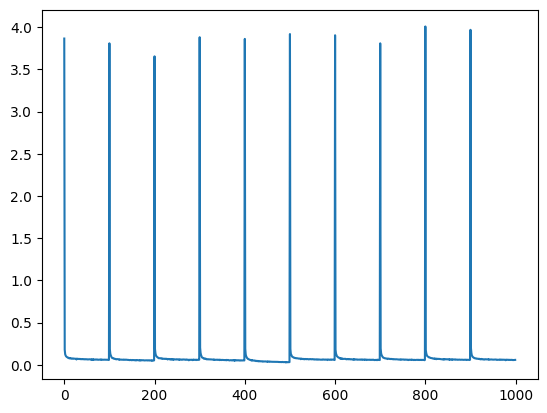

In [ ]:
#확률적 경사 하강법
# 일반 딥러닝
import numpy as np
import matplotlib.pyplot as plt

class Singlelayer:
  def __init__(self):
    self.w=None
    self.b=None
    self.losses=[]
    self.val_losses=[]
    self.w_history=[]
    self.l2=0.01
    self.count=0
  def forpass(self,x):
    z=self.b+np.sum(x*self.w)
    return z
  def backprop(self,x,err):
    w_grad=err*x
    b_grad=err
    return w_grad,b_grad
  def activation(self,z):
    z=np.clip(z,-100,None)
    a=1/(1+np.exp(-z))
    return a
  def reg_losses(self):
    return self.l2*np.sum(self.w**2)
  def update_val_losses(self,x,y):
    val_loss=0
    index=np.random.permutation(len(x))
    for i in index:
      z=self.forpass(x[i])
      a=self.activation(z)
      a=np.clip(a,1e-10,1-1e-10)
      val_loss+=-(y[i]*np.log(a)+(1-y[i])*np.log(1-a))+self.reg_losses()
    self.val_losses.append(val_loss/len(y))
  def train(self,x,y,epoch=100,x_val=None,y_val=None):
    self.w=np.ones(x.shape[1])
    self.b=0
    self.w_history.append(self.w.copy())
    for i in range(epoch):
      self.count+=1
      if self.count%100==0:
        print('count=',self.count)
        pass
      loss=0
      index=np.random.permutation(len(x))
      for j in index:
        z=self.forpass(x[j])
        a=self.activation(z)
        err=y[j]-a
        w_grad,b_grad=self.backprop(x[j],err)
        self.w+=w_grad*self.l2
        self.b+=b_grad
        self.w_history.append(self.w.copy())
        a=np.clip(a,1e-10,1-1e-10)
        loss+=-(y[j]*np.log(a)+(1-y[j])*np.log(1-a))
      self.losses.append(loss/len(y))
      self.update_val_losses(x_val,y_val)
  def predict(self,x):
    z=[self.forpass(x_i) for x_i in x]
    return np.array(z)>0
  def score(self,x,y):
    return np.mean(self.predict(x)==y)

def main():
  from sklearn.datasets import load_breast_cancer  # 사이킷런 데이터 가져오기
  from sklearn.model_selection import train_test_split
  cancer=load_breast_cancer()
  x=cancer.data
  y=cancer.target
  s=Singlelayer()
  x_train_all,x_test,y_train_all,y_test=train_test_split(x,y,stratify=y,test_size=0.3,random_state=42)
  k=10
  val_scores=[]
  for i in range(k):
    start=i*(len(x_train_all)//k)
    end=(i+1)*(len(x_train_all)//k)
    val_fold=x_train_all[start:end]
    val_target=y_train_all[start:end]
    lst=list(range(0,start))+list(range(end,len(x_train_all)))
    x_fold=x_train_all[lst]
    x_target=y_train_all[lst]
    x_mean=np.mean(x_fold,axis=0)
    x_std=np.std(x_fold,axis=0)
    x_scaled=(x_fold-x_mean)/x_std
    val_scaled=(val_fold-x_mean)/x_std
    s.train(x_scaled,x_target,x_val=val_scaled,y_val=val_target)
    score=s.score(val_scaled,val_target)
    val_scores.append(score)
  print(np.mean(val_scores))
  plt.plot(s.losses)
  plt.show()

main()

In [ ]:
# 딥러닝 자연어처리
!pip install ratsnlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 582.5/582.5 KB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 41.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB

In [ ]:
# 딥러닝 자연어처리
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


In [ ]:
# 딥러닝 자연어처리
with open('/gdrive/My Drive/test.txt','w') as f:
  f.writelines("test")

In [ ]:
# 딥러닝 자연어처리
from Korpora import Korpora
nsmc=Korpora.load("nsmc", force_download=True)


    Korpora 는 다른 분들이 연구 목적으로 공유해주신 말뭉치들을
    손쉽게 다운로드, 사용할 수 있는 기능만을 제공합니다.

    말뭉치들을 공유해 주신 분들에게 감사드리며, 각 말뭉치 별 설명과 라이센스를 공유 드립니다.
    해당 말뭉치에 대해 자세히 알고 싶으신 분은 아래의 description 을 참고,
    해당 말뭉치를 연구/상용의 목적으로 이용하실 때에는 아래의 라이센스를 참고해 주시기 바랍니다.

    # Description
    Author : e9t@github
    Repository : https://github.com/e9t/nsmc
    References : www.lucypark.kr/docs/2015-pyconkr/#39

    Naver sentiment movie corpus v1.0
    This is a movie review dataset in the Korean language.
    Reviews were scraped from Naver Movies.

    The dataset construction is based on the method noted in
    [Large movie review dataset][^1] from Maas et al., 2011.

    [^1]: http://ai.stanford.edu/~amaas/data/sentiment/

    # License
    CC0 1.0 Universal (CC0 1.0) Public Domain Dedication
    Details in https://creativecommons.org/publicdomain/zero/1.0/



[nsmc] download ratings_train.txt: 14.6MB [00:00, 197MB/s]
[nsmc] download ratings_test.txt: 4.90MB [00:00, 109MB/s]


In [ ]:
# 딥러닝 자연어 처리
import os
def write_lines(path, lines):
    with open(path, 'w', encoding='utf-8') as f:
        for line in lines:
            f.write(f'{line}\n')

write_lines("/content/train.txt", nsmc.train.get_all_texts())
write_lines("/content/test.txt", nsmc.test.get_all_texts())

In [ ]:
# 딥러닝 자연어 처리
!pip install tokenizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 90.5 MB/s eta 0:00:00


In [ ]:
# 딥러닝 자연어 처리
import os
os.makedirs("/gdrive/My Drive/nlpbook/bbpe", exist_ok=True)

In [ ]:
# 딥러닝 자연어 처리
from tokenizers import ByteLevelBPETokenizer
bytebpe_tokenizer = ByteLevelBPETokenizer()
bytebpe_tokenizer.train(
    files=["/content/train.txt", "/content/test.txt"],
    vocab_size=10000,
    special_tokens=["[PAD]"]
)
bytebpe_tokenizer.save_model("/gdrive/My Drive/nlpbook/bbpe")

['/gdrive/My Drive/nlpbook/bbpe/vocab.json',
 '/gdrive/My Drive/nlpbook/bbpe/merges.txt']

In [ ]:
# 딥러닝 자연어 처리
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 22.4 MB/s eta 0:00:00


In [ ]:
# 딥러닝 자연어 처리
#토큰화 과정 실습
from transformers import GPT2Tokenizer
tokenizer_gpt=GPT2Tokenizer.from_pretrained("/gdrive/My Drive/nlpbook/bbpe")
tokenizer_gpt.pad_token="[PAD]"
sentences=[
    "태영이 오늘 모의고사 보네?",
    "지민이도 모의고사 보네?",
    "둘 다 화이팅 내 동생들!"
]
batch_inputs=tokenizer_gpt(
    sentences,
    padding="max_length",
    max_length=14,
    truncation=True
)
print(batch_inputs)
print(batch_inputs["input_ids"])
print(batch_inputs["attention_mask"])

{'input_ids': [[1211, 4975, 2550, 527, 306, 274, 531, 353, 373, 31, 0, 0, 0, 0], [284, 925, 5649, 527, 306, 274, 531, 353, 373, 31, 0, 0, 0, 0], [3518, 409, 3374, 463, 4635, 331, 1, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]]}
[[1211, 4975, 2550, 527, 306, 274, 531, 353, 373, 31, 0, 0, 0, 0], [284, 925, 5649, 527, 306, 274, 531, 353, 373, 31, 0, 0, 0, 0], [3518, 409, 3374, 463, 4635, 331, 1, 0, 0, 0, 0, 0, 0, 0]]
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]]


<ipython-input-5-f21be7508c78>:26: RuntimeWarning: overflow encountered in square
  return self.l2*np.sum(self.w**2)
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


0.9666666666666666


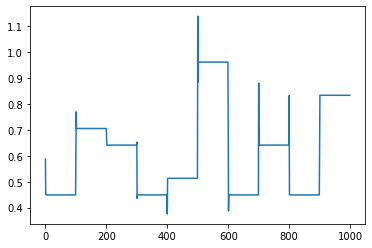

In [ ]:
# 그냥 딥러닝
#배치 경사 하강법
import numpy as np
import matplotlib.pyplot as plt

class Singlelayer:
  def __init__(self):
    self.w=None
    self.b=None
    self.losses=[]
    self.val_losses=[]
    self.w_history=[]
    self.l2=0.01 #L2 규제를 위한 하이퍼 파라미터 값을 정합니다.
  def forpass(self,x):
    z=self.b+np.sum(self.w*x)
    return z
  def backprop(self,x,err):
    w_grad=err*x
    b_grad=err
    return w_grad,b_grad
  def activation(self,z):
    z=np.clip(z,-100,None)
    a=1/(1+np.exp(-z))
    return a
  def reg_losses(self):
    return self.l2*np.sum(self.w**2)
  def update_val_losses(self,x,y):
    val_loss=0
    index=np.random.permutation(len(x))
    for i in index:
      z=self.forpass(x[i])
      a=self.activation(z)
      a=np.clip(a,1e-10,1-1e-10)
      val_loss+=-(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
    self.val_losses.append(val_loss/len(y)+self.reg_losses())
  def train(self,x,y,epoch=100,x_val=None,y_val=None):
    self.w=np.ones(x.shape[1])
    self.b=0
    for i in range(epoch):
      loss=0
      index=np.random.permutation(len(x))
      for j in index:
        z=self.forpass(x[j])
        a=self.activation(z)
        err=y[j]-a
        w_grad,b_grad=self.backprop(x[j],err)
        w_grad+=self.l2*self.w
        self.w+=w_grad
        self.b+=b_grad
        a=np.clip(a,1e-10,1-1e-10)
        loss+=-(y[j]*np.log(a)+(1-y[j])*np.log(1-a))
      self.losses.append(loss/len(y))
      self.update_val_losses(x_val,y_val)
  def predict(self,x):
    z=[self.forpass(x_i) for x_i in x]
    return np.array(z)>0
  def score(self,x,y):
    return np.mean(self.predict(x)==y)

def main():
  from sklearn.datasets import load_breast_cancer
  from sklearn.model_selection import train_test_split
  cancer=load_breast_cancer()
  x=cancer.data
  y=cancer.target
  s=Singlelayer()
  x_train_all,x_test,y_train_all,y_test=train_test_split(x,y,stratify=y,test_size=0.3,random_state=42) #먼저 훈련 세트와 테스트 세트를 나눈다.
  k=10
  val_scores=[]
  for i in range(k):
    start=i*(len(x_train_all)//k)
    end=(i+1)*(len(x_train_all)//k)
    val_fold=x_train_all[start:end]
    val_target=y_train_all[start:end]
    lst=list(range(0,start))+list(range(end,len(x_train_all)))
    x_fold=x_train_all[lst]
    x_target=y_train_all[lst]
    x_mean=np.mean(x_fold,axis=0)
    x_std=np.std(x_fold,axis=0)
    x_scaled=(x_fold-x_mean)/x_std
    val_scaled=(val_fold-x_mean)/x_std
    s.train(x_scaled,x_target,x_val=val_scaled,y_val=val_target)
    score=s.score(val_scaled,val_target)
    val_scores.append(score)
  print(np.mean(val_scores))
  plt.plot(s.losses)
  plt.show()

main()

In [ ]:
# 딥러닝 GAN
#하려는 작업: 1010에 최대한 비슷한 패턴을 신경망이 만들어내도록 하는 것(별도의 데이터 없이 신경망이 스스로 학습해가면서 1010과 비슷한 패턴을 만들어내게끔 하는 것)
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas
import random

def gen_real():
  real_data=torch.FloatTensor([
      random.uniform(0.8,1.0),
      random.uniform(0,0.2),
      random.uniform(0.8,1.0),
      random.uniform(0,0.2)
  ])
  return real_data

class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(4,3),
        nn.Sigmoid(),
        nn.Linear(3,1),
        nn.Sigmoid()
    )
    self.loss_function=nn.MSELoss()
    self.optimiser=torch.optim.SGD(self.parameters(), lr=0.01)
    self.count=0
    self.progress=[]
  def forward(self,input):
    return self.model(input)
  def train(self,input,target):
    output=self.forward(input)
    loss=self.loss_function(output,target)
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()
    self.count+=1
    if self.count%10==0:
      self.progress.append(loss.item())
      pass
    if self.count%10000==0:
      print('*',end='--')
      pass
  def plot_progress(self):
    df=pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0), figsize=(16,8), alpha=0.1, marker='.',grid=True, yticks=(0,0.25,0.5,1.0,5.0))
    pass
  pass

class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(1,3),
        nn.Sigmoid(),
        nn.Linear(3,4),
        nn.Sigmoid()
    )
    self.optimiser=torch.optim.SGD(self.parameters(),lr=0.01)
    self.count=0
    self.progress=[]
  def forward(self,input):
    return self.model(input)
  def train(self,d,input,target):
    g_output=self.forward(input)
    d_output=d.forward(g_output)
    loss=d.loss_function(d_output,target)
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()
    self.count+=1
    if self.count%10==0:
      self.progress.append(loss.item())
      pass
    if self.count%10000==0:
      print('*',end='--')
      pass
  def plot_progress(self):
    df=pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0),figsize=(16,8), alpha=0.1, marker='.',grid=True, yticks=(0,0.25,0.5,1.0,5.0))
    pass
  pass

def main():
  d=Discriminator()
  g=Generator()
  for i in range(40000):
    d.train(gen_real(),torch.FloatTensor([1.0]))
    d.train(g.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0]))
    g.train(d,torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))
    pass
  print('\n')
  print(g.forward(torch.FloatTensor([0.5])).detach())

main()

*--*--*--

KeyboardInterrupt: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: ignored

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


count= 10000
count= 20000
count= 30000
count= 40000
count= 50000
count= 60000
count= 70000
count= 80000
count= 90000
count= 100000
count= 110000
count= 120000




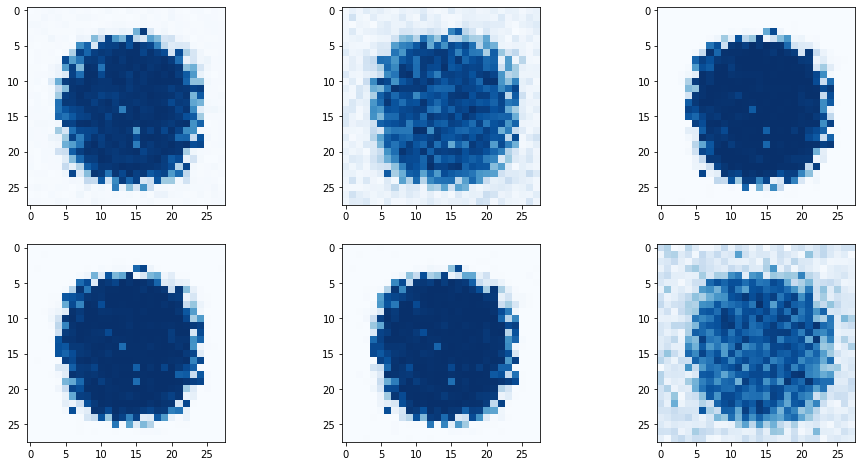

In [ ]:
# 딥러닝 GAN
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import pandas, random
import numpy as np
import matplotlib.pyplot as plt

class Mnistdataset(Dataset):
  def __init__(self,csv_file):
    self.data_df=pandas.read_csv(csv_file, header=None)
    self.labels=np.asarray(self.data_df.iloc[:,0])
    self.images=np.asarray(self.data_df.iloc[:,1:])
    pass
  def __len__(self):
    return len(self.data_df)
  def __getitem__(self,index):
    label=self.labels[index]
    image_values=self.images[index]
    return label,torch.FloatTensor(image_values),torch.FloatTensor([label])


class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(784,200),
        nn.Sigmoid(),
        nn.LayerNorm(200),
        nn.Linear(200,1),
        nn.Sigmoid()
    )
    self.loss_function=nn.MSELoss()
    self.optimiser=torch.optim.SGD(self.parameters(),lr=0.01)
    self.count=0
    self.progress=[]
  def forward(self,input):
    return self.model(input)
  def train(self,input,target):
    output=self.forward(input)
    loss=self.loss_function(output,target)
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()
    self.count+=1
    if self.count%10==0:
      self.progress.append(loss.item())
      pass
    if self.count%10000==0:
      print('count=',self.count)
      pass
  def plot_progress(self):
    df=pandas.DataFrame(self.progress,columns=['loss'])
    df.plot(ylim=(0),figsize=(16,8),alpha=0.1,marker='.',grid=True,yticks=(0,0.25,0.5,1.0,5.0))
    pass
  pass

class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(100,200),
        nn.Sigmoid(),
        nn.LayerNorm(200),
        nn.Linear(200,784),
        nn.Sigmoid()
    )
    self.optimiser=torch.optim.SGD(self.parameters(),lr=0.01)
    self.count=0
    self.progress=[]
  def forward(self,input):
    return self.model(input)
  def train(self,d,input,target):
    g_output=self.forward(input)
    d_output=d.forward(g_output)
    loss=d.loss_function(d_output,target)
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()
    self.count+=1
    if self.count%10==0:
      self.progress.append(loss.item())
      pass
  def plot_progress(self):
    df=pandas.DataFrame(self.progress,columns=['loss'])
    df.plot(ylim=(0),figsize=(16,8),alpha=0.1,marker='.',grid=True, yticks=(0,0.25,0.5,1.0,5.0))
    pass
  pass

def generate_random(size):
  return torch.randn(size,100)

def main():
  d=Discriminator()
  g=Generator()
  mnist_dataset=Mnistdataset('/content/drive/My Drive/Colab Notebooks/myo_gan/mnist_data/mnist_train.csv')
  for label, image_values_tensor,target_tensor in mnist_dataset:
    d.train(image_values_tensor,torch.FloatTensor([1.0]))
    d.train(g.forward(generate_random(1)).detach(),torch.FloatTensor([0.0]))
    g.train(d,generate_random(1),torch.FloatTensor([1.0]))
    pass
  print('\n')
  f,axarr=plt.subplots(2,3,figsize=(16,8))
  for i in range(2):
    for j in range(3):
      output=g.forward(generate_random(1))
      img=output.detach().numpy().reshape(28,28)
      axarr[i,j].imshow(img,interpolation='none',cmap='Blues')
      pass
    pass

main()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


count= 10000
count= 20000
count= 30000
count= 40000
count= 50000
count= 60000
count= 70000
count= 80000
count= 90000
count= 100000
count= 110000
count= 120000
count= 130000
count= 140000
count= 150000
count= 160000
count= 170000
count= 180000
count= 190000
count= 200000
count= 210000
count= 220000
count= 230000
count= 240000
count= 250000
count= 260000
count= 270000
count= 280000
count= 290000
count= 300000
count= 310000
count= 320000
count= 330000
count= 340000
count= 350000
count= 360000
count= 370000
count= 380000
count= 390000
count= 400000
count= 410000
count= 420000
count= 430000
count= 440000
count= 450000
count= 460000
count= 470000
count= 480000




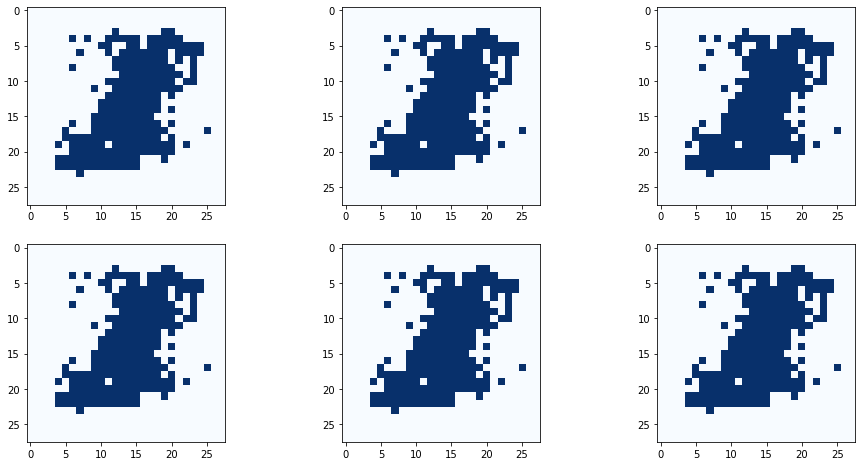

In [ ]:
# 딥러닝 GAN
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import pandas, random
import numpy as np
import matplotlib.pyplot as plt

def generate_random(size):
  return torch.randn(size)

class Mnistdataset(Dataset):
  def __init__(self,csv_file):
    self.data_df=pandas.read_csv(csv_file, header=None)
    self.labels=np.asarray(self.data_df.iloc[:,0])
    self.image_values=np.asarray(self.data_df.iloc[:,1:])
  def __len__(self):
    return len(self.data_df)
  def __getitem__(self,index):
    label=self.labels[index]
    image_value=self.image_values[index]
    return label, torch.FloatTensor([image_value]), torch.FloatTensor([label])


class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(784,200),
        nn.LeakyReLU(0.02),
        nn.LayerNorm(200),
        nn.Linear(200,1),
        nn.Sigmoid()
    )
    self.loss_function=nn.BCELoss()
    self.optimiser=torch.optim.Adam(self.parameters(),lr=0.0002,betas=(0.5,0.999))
    self.count=0
    self.progress=[]
  def forward(self,input):
    return self.model(input)
  def train(self,input, target):
    output=self.forward(input)
    loss=self.loss_function(output,target)
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()
    self.count+=1
    if self.count%10==0:
      self.progress.append(loss.item())
      pass
    if self.count%10000==0:
      print('count=',self.count)
      pass
  def plot_progress(self):
    df=pandas.DataFrame(self.progress,columns=['loss'])
    df.plot(ylim=(0,1.0),figsize=(16,8),alpha=0.1,marker='.',grid=True, yticks=(0,0.25,0.5))
    pass
  pass

class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(100,200),
        nn.LeakyReLU(0.02),
        nn.LayerNorm(200),
        nn.Linear(200,784),
        nn.Sigmoid()
    )
    self.optimiser=torch.optim.Adam(self.parameters(),lr=0.0002,betas=(0.5,0.999))
    self.count=0
    self.progress=[]
  def forward(self,input):
    return self.model(input)
  def train(self,d,input, target):
    g_output=self.forward(input)
    d_output=d.forward(g_output)
    loss=d.loss_function(d_output,target)
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()
    self.count+=1
    if self.count%10==0:
      self.progress.append(loss.item())
      pass
  def plot_progress(self):
    df=pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0,1.0),figsize=(16,8),alpha=0.1,marker='.',grid=True, yticks=(0,0.25,0.5))
    pass
  pass

def main():
  d=Discriminator()
  g=Generator()
  mnist_dataset=Mnistdataset('/content/drive/My Drive/Colab Notebooks/myo_gan/mnist_data/mnist_train.csv')
  epoch=4
  for i in range(epoch):
    for label,image_values_tensor, target_tensor in mnist_dataset:
      d.train(image_values_tensor, torch.FloatTensor([1.0]).reshape(1,1))
      d.train(g.forward(generate_random(100)).detach(), torch.tensor([0.0]))
      g.train(d, generate_random(100), torch.tensor([1.0]))
      pass
  print('\n')
  f,axarr=plt.subplots(2,3,figsize=(16,8))
  for i in range(2):
    for j in range(3):
      output=g.forward(generate_random(100))
      img=output.detach().numpy().reshape(28,28)
      axarr[i,j].imshow(img,interpolation='none',cmap='Blues')
      pass
    pass

main()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


epoch= 1
count= 10000
count= 20000
count= 30000
count= 40000
count= 50000
count= 60000
count= 70000
count= 80000
count= 90000
count= 100000
count= 110000
count= 120000
epoch= 2
count= 130000
count= 140000
count= 150000
count= 160000
count= 170000
count= 180000
count= 190000
count= 200000
count= 210000
count= 220000
count= 230000
count= 240000


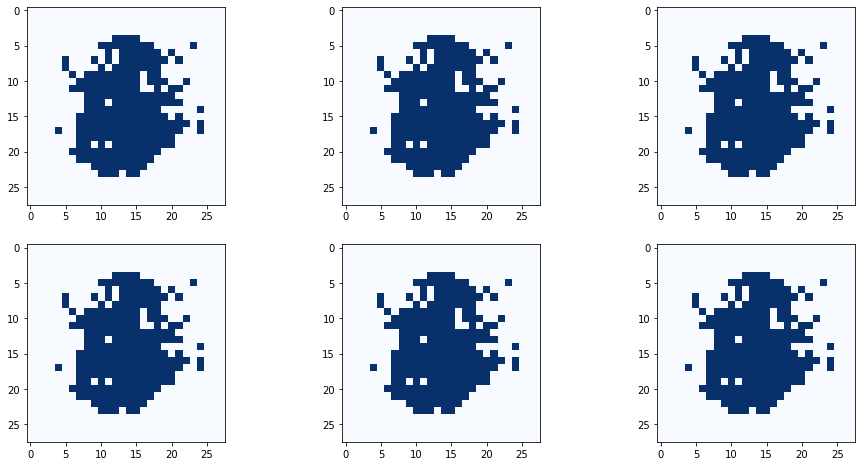

In [ ]:
# 딥러닝 GAN
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import pandas, random
import numpy as np
import matplotlib.pyplot as plt

def Generate_random(size):
  return torch.randn(size)

class Mnistdataset(Dataset):
  def __init__(self, csv_file):
    self.data_df=pandas.read_csv(csv_file,header=None)
    self.labels=np.asarray(self.data_df.iloc[:,0])
    self.image_values=np.asarray(self.data_df.iloc[:,1:])
  def __len__(self):
    return len(self.data_df)
  def __getitem__(self,index):
    label=self.labels[index]
    image_value=self.image_values[index]
    return label,torch.FloatTensor([image_value]),torch.FloatTensor([label])

class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(784,200),
        nn.LeakyReLU(0.02),
        nn.LayerNorm(200),
        nn.Linear(200,1),
        nn.Sigmoid()
    )
    self.loss_function=nn.BCELoss()
    self.optimiser=torch.optim.Adam(self.parameters(),lr=0.0002, betas=(0.5,0.999))
    self.count=0
    self.progress=[]
  def forward(self, input):
    return self.model(input)
  def train(self,input, target):
    output=self.forward(input)
    loss=self.loss_function(output,target)
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()
    self.count+=1
    if self.count%10==0:
      self.progress.append(loss.item())
      pass
    if self.count%10000==0:
      print('count=',self.count)
      pass
  def plot_progress(self):
    df=pandas.DataFrame(self.progress,columns=['loss'])
    df.plot(ylim=(0,1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0,0.25,0.5))
    pass
  pass

class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(100,200),
        nn.LeakyReLU(0.02),
        nn.LayerNorm(200),
        nn.Linear(200,784),
        nn.Sigmoid()
    )
    self.optimiser=torch.optim.Adam(self.parameters(),lr=0.0002, betas=(0.5,0.999))
    self.count=0
    self.progress=[]
  def forward(self,input):
    return self.model(input)
  def train(self, d, input, target):
    g_output=self.forward(input)
    d_output=d.forward(g_output)
    loss=d.loss_function(d_output,target)
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()
    self.count+=1
    if self.count%10==0:
      self.progress.append(loss.item())
      pass
  def plot_progress(self):
    df=pandas.DataFrame(self.progress,columns=['loss'])
    df.plot(ylim=(0,1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0,0.25,0.5))
    pass
  pass

def main():
  d=Discriminator()
  g=Generator()
  mnist_dataset=Mnistdataset('/content/drive/My Drive/Colab Notebooks/myo_gan/mnist_data/mnist_train.csv')
  epoch=2
  for i in range(epoch):
    print('epoch=',i+1)
    for label, image_value_tensor, target_tensor in mnist_dataset:
      d.train(image_value_tensor, torch.FloatTensor([1.0]).reshape(1,1))
      d.train(g.forward(Generate_random(100)),torch.tensor([0.0]))
      g.train(d, Generate_random(100), torch.tensor([1.0]))
    pass
  pass
  f,axarr=plt.subplots(2,3,figsize=(16,8))
  for i in range(2):
    for j in range(3):
      output=g.forward(Generate_random(100))
      img=output.detach().numpy().reshape(28,28)
      axarr[i,j].imshow(img, interpolation='none', cmap='Blues')
      pass
    pass

main()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 딥러닝 GAN
import torch
import torch.nn as nn
from torch.utils.data import Dataset

import pandas, numpy, random
import matplotlib.pyplot as plt

class MnistDataset(Dataset):

    def __init__(self, csv_file):
        self.data_df = pandas.read_csv(csv_file, header=None)
        pass

    def __len__(self):
        return len(self.data_df)

    def __getitem__(self, index):
        # image target (label)
        label = self.data_df.iloc[index,0]
        target = torch.zeros((10))
        target[label] = 1.0

        # image data, normalised from 0-255 to 0-1
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0

        # return label, image data tensor and target tensor
        return label, image_values, target

    def plot_image(self, index):
        img = self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.title("label = " + str(self.data_df.iloc[index,0]))
        plt.imshow(img, interpolation='none', cmap='Blues')
        pass

    pass
# discriminator class

class Discriminator(nn.Module):

    def __init__(self):
        # initialise parent pytorch class
        super().__init__()

        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.Sigmoid(),
            nn.Linear(200, 1),
            nn.Sigmoid()
        )

        # create loss function
        self.loss_function = nn.MSELoss()

        # create optimiser, simple stochastic gradient descent
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # counter and accumulator for progress
        self.counter = 0;
        self.progress = []

        pass


    def forward(self, inputs):
        # simply run model
        return self.model(inputs)


    def train(self, inputs, targets):
        # calculate the output of the network
        outputs = self.forward(inputs)

        # calculate loss
        loss = self.loss_function(outputs, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass


    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass

    pass

# generator class

class Generator(nn.Module):

    def __init__(self):
        # initialise parent pytorch class
        super().__init__()

        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(1, 200),
            nn.Sigmoid(),
            nn.Linear(200, 784),
            nn.Sigmoid()
        )

        # create optimiser, simple stochastic gradient descent
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # counter and accumulator for progress
        self.counter = 0;
        self.progress = []

        pass


    def forward(self, inputs):
        # simply run model
        return self.model(inputs)


    def train(self, D, inputs, targets):
        # calculate the output of the network
        g_output = self.forward(inputs)

        # pass onto Discriminator
        d_output = D.forward(g_output)

        # calculate error
        loss = D.loss_function(d_output, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass


    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass

    pass

def generate_random():
  return random.uniform(0,100)

D=Discriminator()
G=Generator()
mnist_dataset=MnistDataset('/content/drive/My Drive/Colab Notebooks/myo_gan/mnist_data/mnist_train.csv')

# 판별기와 생성기 훈련
for label,image_data_tensor,target_tensor in mnist_dataset:

  # 참에 대해 판별기 훈련
  D.train(image_data_tensor,torch.FloatTensor([1.0]))

  # 거짓에 대해 판별기 훈련
  # G의 기울기가 계산되지 않도록 detach() 함수를 이용
  D.train(G.forward(generate_random()).detach(),torch.FloatTensor([0.0]))

  # 생성기 훈련
  G.train(D,generate_random(),torch.FloatTensor([1.0]))

  pass

f,axarr=plt.subplots(2,3,figsize=(16,8))
for i in range(2):
  for j in range(3):
    output=G.forward(generate_random())
    img=output.detach().numpy().reshape(28,28)
    axarr[i,j].imshow(img,interpolation='none',cmap='Blues')
    pass
  pass

TypeError: ignored

In [ ]:
import random
print(random.randint(1,100))

70


In [ ]:
# 일반 딥러닝
import torch
import torch.nn as nn
import pandas
import matplotlib.pyplot as plt

class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(784,200),
        nn.Sigmoid(),
        nn.Linear(200,10),
        nn.Sigmoid()
    )
    self.loss_function=nn.MSELoss()
    self.optimiser=torch.optim.SGD(self.parameters(),lr=0.01)
    self.count=0
    self.progress=[]
  def forward(self,input):
    return self.model(input)
  def train(self,inputs,targets):
    outputs=self.forward(inputs)
    loss=self.loss_function(outputs,targets)
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()
    self.count+=1
    if self.count%10==0:
      self.progress.append(loss.item())
      pass
    if self.count%10000==0:
      print('count=',self.count)
      pass
  def plot_progress(self):
    df=pandas.DataFrame(self.progress,columns=['loss'])
    df.plot(ylim=(0,1.0),figsize=(16,8),alpha=0.1,marker='.',grid=True,yticks=(0,0.25,0.5))
    pass

from torch.utils.data import Dataset
class Mnistdataset(Dataset):
  def __init__(self,csv_file):
    self.data_df=pandas.read_csv(csv_file,header=None)
    pass
  def __len__(self):
    return len(self.data_df)
  def __getitem__(self,index):
    label=self.data_df.iloc[index,0]
    target=torch.zeros((10))
    target[label]=1.0
    image_values=torch.FloatTensor(self.data_df.iloc[index,1:].values)/255.0
    return label,image_values,target
  def plot_image(self,index):
    img=self.data_df.iloc[index,1:].values.reshape(28,28)
    plt.title("label="+str(self.data_df.iloc[index,0]))
    plt.imshow(img,interpolation='none',cmap='Blues')
    pass
  pass

def main():
  mnist_train_dataset=Mnistdataset('/content/drive/My Drive/Colab Notebooks/myo_gan/mnist_data/mnist_train.csv')
  mnist_test_dataset=Mnistdataset('/content/drive/My Drive/Colab Notebooks/myo_gan/mnist_data/mnist_test.csv')
  c=Classifier()
  epoch=3
  for i in range(epoch):
    print('training epoch',i+1,'of', epoch)
    for label,image_values_tensor,target_tensor in mnist_train_dataset:
      c.train(image_values_tensor,target_tensor)
      pass
    pass
  record=42
  image_data=mnist_test_dataset[record][1]
  mnist_test_dataset.plot_image(record)
  output=c.forward(image_data)
  pandas.DataFrame(output.detach().numpy()).plot(kind='bar',legend=False,ylim=(0,1))
main()

training epoch 1 of 3
count= 10000
count= 20000
count= 30000
count= 40000
count= 50000
count= 60000
training epoch 2 of 3
count= 70000
count= 80000
count= 90000
count= 100000
count= 110000
count= 120000
training epoch 3 of 3
count= 130000
count= 140000
count= 150000
count= 160000
count= 170000


In [ ]:
# 일반 딥러닝
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import midi_manipulation

# Load the MIDI data
notes = midi_manipulation.get_notes()

# Preprocess the data
n_timesteps = 128
n_input = len(set(notes))
X, Y = midi_manipulation.prepare_sequences(notes, n_timesteps)

# Define the LSTM model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(512, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(256))
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(n_input, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Train the model
model.fit(X, Y, epochs=100, batch_size=64)

# Generate new music
sequence_length = 100
network_input = np.zeros((1, n_timesteps, n_input))
start = np.random.randint(0, len(X) - 1)
int_to_note = dict((number, note) for number, note in enumerate(sorted(set(notes))))
pattern = X[start]
prediction_output = []
for note_index in range(sequence_length):
    prediction_input = np.reshape(pattern, (1, len(pattern), 1))
    prediction_input = prediction_input / float(n_input)
    prediction = model.predict(prediction_input, verbose=0)
    index = np.argmax(prediction)
    result = int_to_note[index]
    prediction_output.append(result)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]

# Convert the output to MIDI format
midi_manipulation.create_midi(prediction_output)

ModuleNotFoundError: ignored

Google Drive 계정에서 스프레드시트를 비롯한 데이터를 Colab 메모장으로 가져오거나 GitHub 등의 여러 다른 소스에서 데이터를 가져올 수 있습니다. Colab을 데이터 과학에 활용하는 방법과 데이터 가져오기에 관해 자세히 알아보려면 <a href="#working-with-data">데이터 사용하기</a> 아래 링크를 참조하세요.

<div class="markdown-google-sans">

## 머신러닝
</div>

Colab을 사용하면 <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">코드 몇 줄</a>만으로 이미지 데이터세트를 가져오고, 이 데이터세트로 이미지 분류기를 학습시키며, 모델을 평가할 수 있습니다. Colab 메모장은 Google 클라우드 서버에서 코드를 실행하므로 사용 중인 컴퓨터의 성능과 관계없이 <a href="#using-accelerated-hardware">GPU 및 TPU</a>를 포함한 Google 하드웨어의 성능을 활용할 수 있습니다. 브라우저만 있으면 사용 가능합니다.

Colab은 다음과 같은 분야의 머신러닝 커뮤니티에서 널리 쓰이고 있습니다.
- TensorFlow 시작하기
- 신경망 개발 및 학습시키기
- TPU로 실험하기
- AI 연구 보급하기
- 튜토리얼 만들기

머신러닝 적용 사례를 보여 주는 Colab 메모장 샘플을 확인하려면 아래 <a href="#machine-learning-examples">머신러닝 예시</a>를 참조하세요.

<div class="markdown-google-sans">

## 추가 리소스

### Colab에서 메모장 사용하기

</div>

- [Colaboratory 개요](/notebooks/basic_features_overview.ipynb)
- [Markdown 가이드](/notebooks/markdown_guide.ipynb)
- [라이브러리 가져오기 및 종속 항목 설치하기](/notebooks/snippets/importing_libraries.ipynb)
- [GitHub에서 노트 저장 및 로드하기](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [대화형 양식](/notebooks/forms.ipynb)
- [대화형 위젯](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### 데이터로 작업하기
</div>

- [데이터 로드: 드라이브, 스프레드시트, Google Cloud Storage](/notebooks/io.ipynb)
- [차트: 데이터 시각화하기](/notebooks/charts.ipynb)
- [BigQuery 시작하기](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### 머신러닝 단기집중과정

<div>

다음은 Google 온라인 머신러닝 과정에서 가져온 일부 메모장입니다. <a href="https://developers.google.com/machine-learning/crash-course/">전체 과정 웹사이트</a>에서 자세한 내용을 확인하세요.
- [Pandas DataFrame 소개](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [합성 데이터를 사용하는 tf.keras 선형 회귀](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### 가속 하드웨어 사용하기
</div>

- [GPU를 사용한 TensorFlow](/notebooks/gpu.ipynb)
- [TPU를 사용한 TensorFlow](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### 추천 예시

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo Voice Swap</a>: Nvidia의 NeMo 대화형 AI 툴킷을 사용하여 오디오 파일의 음성을 컴퓨터에서 생성된 음성으로 변환하세요.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">이미지 분류기 재훈련</a>: 사전에 훈련된 이미지 분류기를 기반으로 꽃을 분류하기 위한 Keras 모델을 구축합니다.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">텍스트 분류</a>: IMDB 영화 리뷰를 <em>긍정적인 리뷰</em> 또는 <em>부정적인 리뷰</em>로 분류합니다.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">스타일 트랜스퍼</a>: 딥 러닝을 사용하여 이미지 간에 스타일을 전이시킵니다.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: 머신러닝 모델을 사용하여 SQuAD 데이터 세트의 질문에 답변합니다.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">동영상 보간 유형</a>: 동영상에서 첫 프레임과 마지막 프레임 사이에 발생한 내용을 예측합니다.
